
# Exploratory Data Analysis (EDA) - Visualization

This notebook performs visual EDA on the SpaceX dataset to uncover patterns and insights using Matplotlib and Seaborn.

## Objectives:
- Visualize relationships such as flight number vs. launch site.
- Understand payload distribution and orbit success rates.
- Explore trends over time.


## Import Required Libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Load Cleaned Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load dataset
df = pd.read_csv("spacex_clean_data.csv")
df.head()



,flight_no.,date_and_time_(utc),"version,_booster[h]",launch_site,payload[i],payload_mass,orbit,customer,launch_outcome,booster_landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060‑15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[j],SSO,Various,Success,Success (LZ‑1)
1,196,"January 10, 2023 04:50[23]",F9 B5 B1076‑2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
2,FH 5,"January 15, 2023 22:56[29]",Falcon Heavy B5 B1070 (core),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,No attempt
3,197,"January 18, 2023 12:24[33]",F9 B5 B1077‑2,"Cape Canaveral, SLC‑40",USA-343 (GPS-III SV06),"4,352 kg (9,595 lb)",MEO,USSF,Success,Success (JRTI)
4,198,"January 19, 2023 15:43[39]",F9 B5 B1075‑1,"Vandenberg, SLC‑4E",Starlink: Group 2-4 (51 satellites),"15,000 kg (33,000 lb)",LEO,SpaceX,Success,Success (OCISLY)


## Create Visualizations

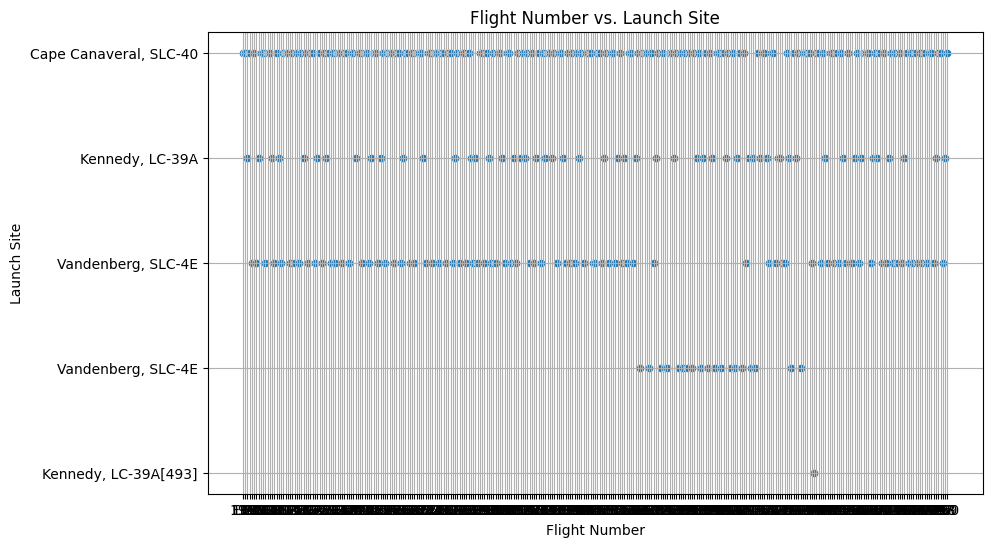

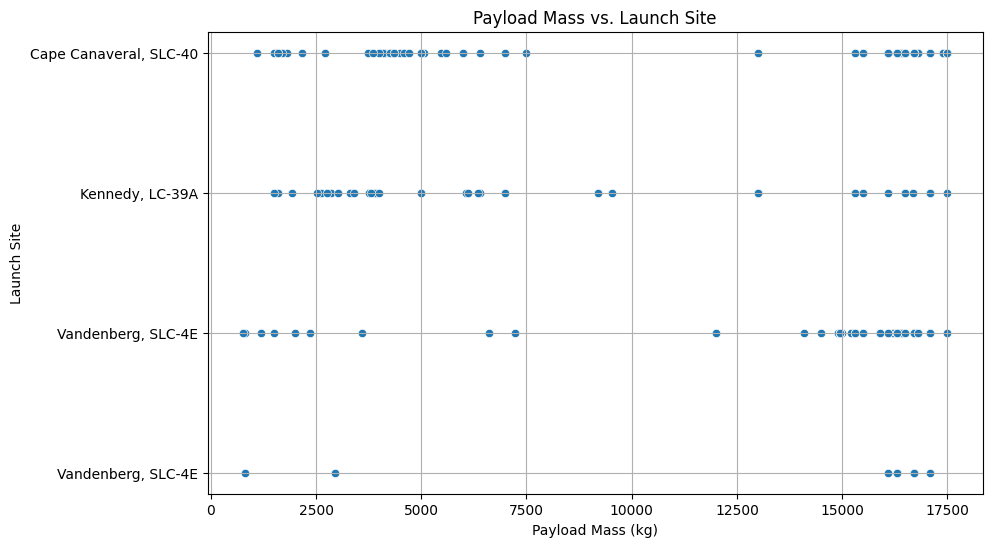

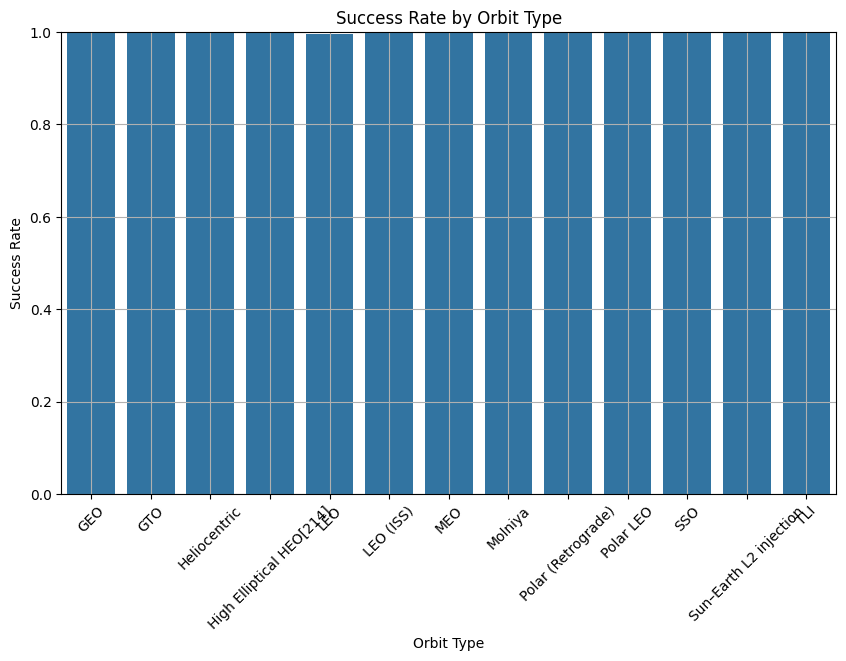

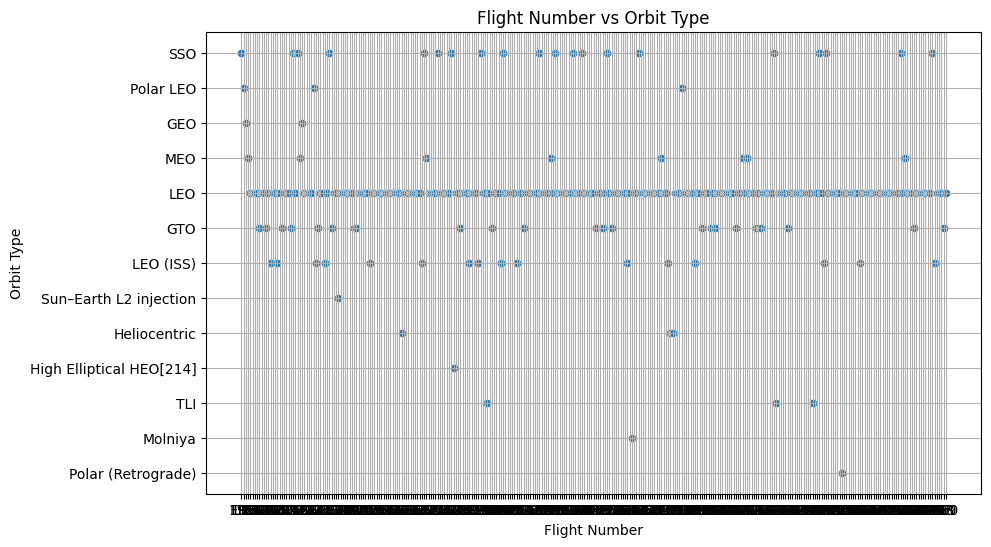

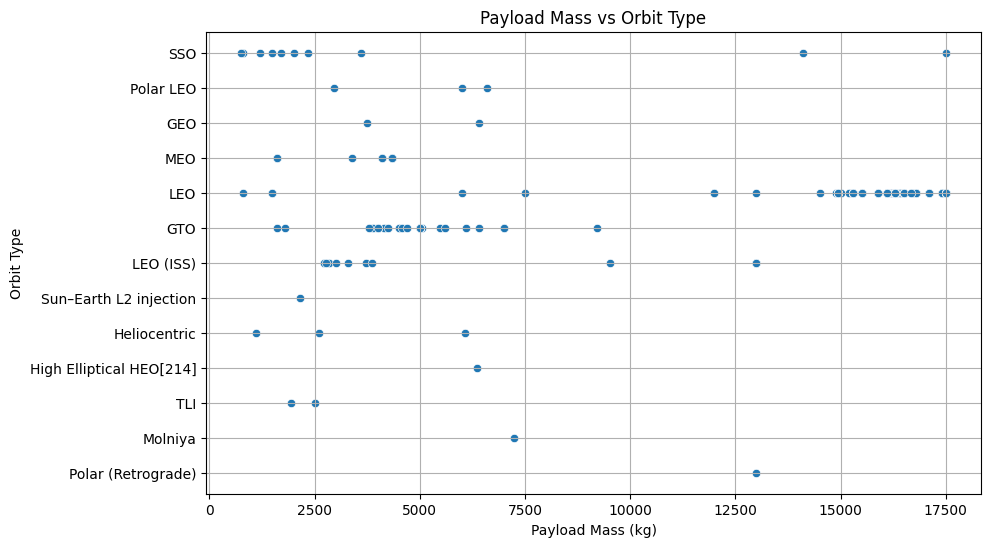

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10664\3664841056.py:69: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date_and_time_(utc)'], errors='coerce')


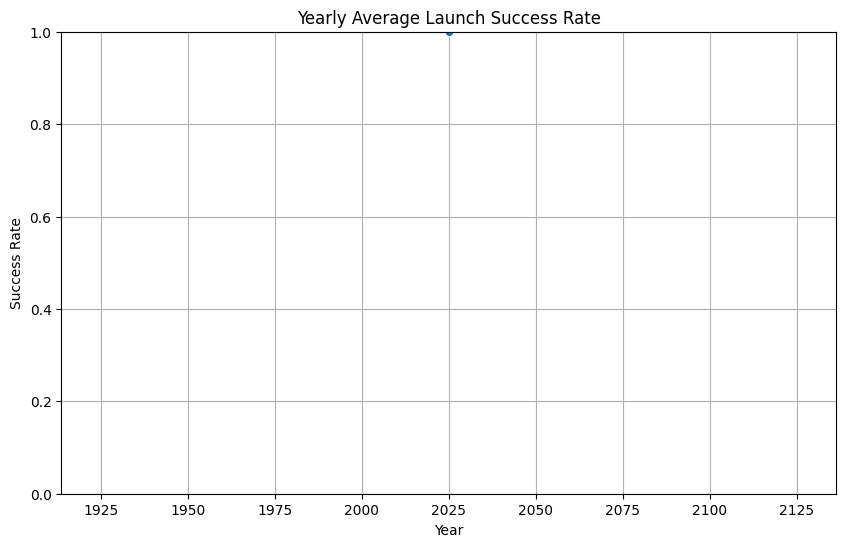

In [3]:

# Clean up relevant columns
df = df[['flight_no.', 'orbit', 'payload_mass', 'launch_outcome', 'date_and_time_(utc)', 'launch_site']].copy()
df = df.dropna()
df = df[df['launch_outcome'].isin(['Success', 'Failure'])]
df['orbit'] = df['orbit'].astype(str).str.strip()

# Convert launch outcome to binary success
df['success'] = df['launch_outcome'].map({'Success': 1, 'Failure': 0})

# Payload mass extraction function
def extract_kg(payload):
    match = re.search(r"([\d,]+)\s*kg", str(payload))
    if match:
        return float(match.group(1).replace(',', ''))
    return None

# Extract numeric payload mass
df['payload_mass_kg'] = df['payload_mass'].apply(extract_kg)

# -------------------- 1. Flight Number vs. Launch Site --------------------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='flight_no.', y='launch_site')
plt.title("Flight Number vs. Launch Site")
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.grid(True)
plt.show()

# -------------------- 2. Payload Mass vs. Launch Site --------------------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='payload_mass_kg', y='launch_site')
plt.title("Payload Mass vs. Launch Site")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.grid(True)
plt.show()

# -------------------- 3. Success Rate by Orbit Type --------------------
plt.figure(figsize=(10, 6))
orbit_success = df.groupby('orbit')['success'].mean().reset_index()
sns.barplot(data=orbit_success, x='orbit', y='success')
plt.title("Success Rate by Orbit Type")
plt.xlabel("Orbit Type")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# -------------------- 4. Flight Number vs Orbit Type --------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='flight_no.', y='orbit')
plt.title("Flight Number vs Orbit Type")
plt.xlabel("Flight Number")
plt.ylabel("Orbit Type")
plt.grid(True)
plt.show()

# -------------------- 5. Payload Mass vs Orbit Type --------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='payload_mass_kg', y='orbit')
plt.title("Payload Mass vs Orbit Type")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit Type")
plt.grid(True)
plt.show()

# -------------------- 6. Yearly Launch Success Trend --------------------
df['date'] = pd.to_datetime(df['date_and_time_(utc)'], errors='coerce')
df['year'] = df['date'].dt.year
yearly_success = df.groupby('year')['success'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_success, x='year', y='success', marker='o')
plt.title("Yearly Average Launch Success Rate")
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.show()
